# 2nd last question incomplete

## EDA And Feature Engineering Of Google Play Store Dataset

1. Problem statement.
   Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2. Data Collection.

The data consists of 20 column and 10841 rows.


### Steps We Are Going to Follow

1. Data Clearning
2. Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape


(10841, 13)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Feature Engineering


##### Missing Values


In [6]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### Observations

- The dataset has misssing values:
  - Rating has 1474 missing values.
  - Type has 1 missing values.
  - Content Rating has 1 missing value.
  - Currency Rating has 8 missing values.
  - Android Ver has 3 missing values.


In [7]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df['Reviews'].nunique()


6002

In [9]:
df['Reviews'].str.isnumeric().sum(), df.shape


(10840, (10841, 13))

In [10]:
df[~df['Reviews'].str.isnumeric()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df_copy = df.copy()


In [12]:
df_copy.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [13]:
df_copy.drop(df_copy.index[10472], inplace=True)
df_copy[~df_copy['Reviews'].str.isnumeric()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)


In [15]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


##### Size feature


In [16]:
df_copy['Size'].nunique()


461

In [17]:
df_copy['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)


In [19]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


##### Installs


In [20]:
df_copy['Price'].nunique(), df_copy['Price'].unique()


(92,
 array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
        '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
        '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
        '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
        '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
        '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
        '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
        '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
        '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
        '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
        '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
        '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
        '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
        '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
df['Installs'].nunique(), df['Installs'].unique()


(22,
 array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
        '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
        '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
        '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object))

In [22]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols] = df_copy[cols].str.replace(item, '')


In [23]:
df_copy['Price'].nunique(), df_copy['Price'].unique()


(92,
 array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
        '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
        '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
        '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
        '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
        '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
        '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
        '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
        '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
        '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
        '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
        '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
        '1.20', '1.04'], dtype=object))

In [24]:
df_copy['Installs'].nunique(), df_copy['Installs'].unique()


(20,
 array(['10000', '500000', '5000000', '50000000', '100000', '50000',
        '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
        '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object))

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [26]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)


In [27]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [28]:
df.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


#### 'Last Updated'


In [29]:
df['Last Updated'].head()


0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [30]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year


In [31]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [32]:
df_copy['Content Rating'].value_counts()


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

## EDA


In [33]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df_copy[df_copy.duplicated('App')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [35]:
df_copy.duplicated('App').sum()


1181

In [36]:
df_copy.drop_duplicates('App', inplace=True)
df_copy.duplicated().sum()


0

In [37]:
df_copy[df_copy.duplicated('App')].shape


(0, 16)

##### Observation:

- The dataset has dupliates and has been dropepd successfully.


## Lets go ahead and explore more data


In [38]:
numeric_features = [
    feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [
    feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(
    len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(
    len(categorical_features), categorical_features))


We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Visualization Diagrams


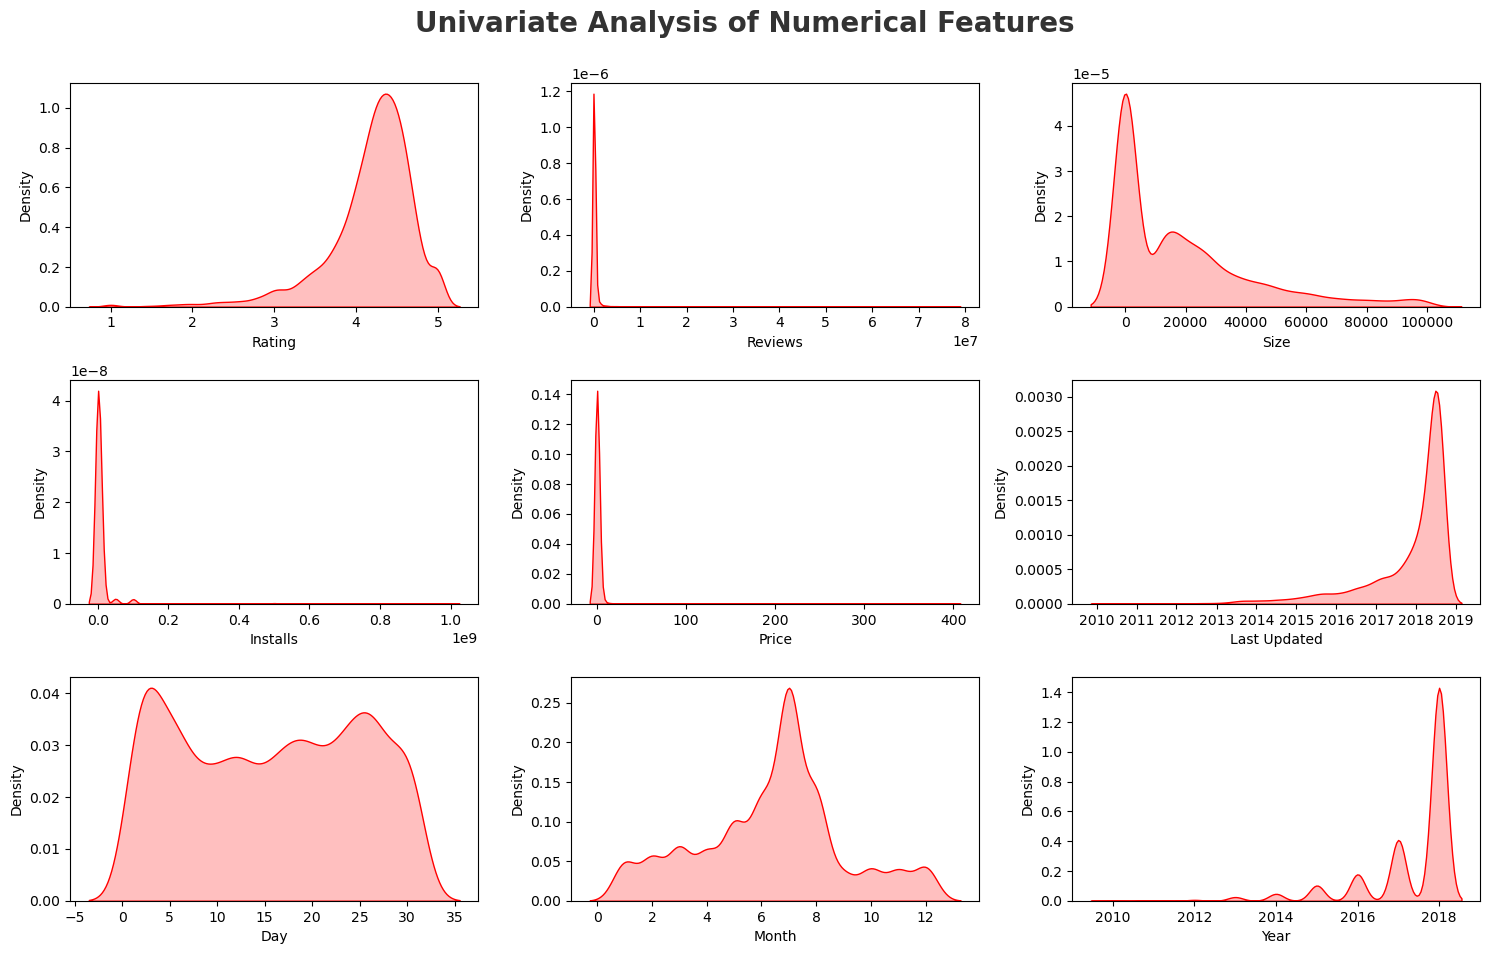

In [39]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features',
             fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]], shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


##### Observations

- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed


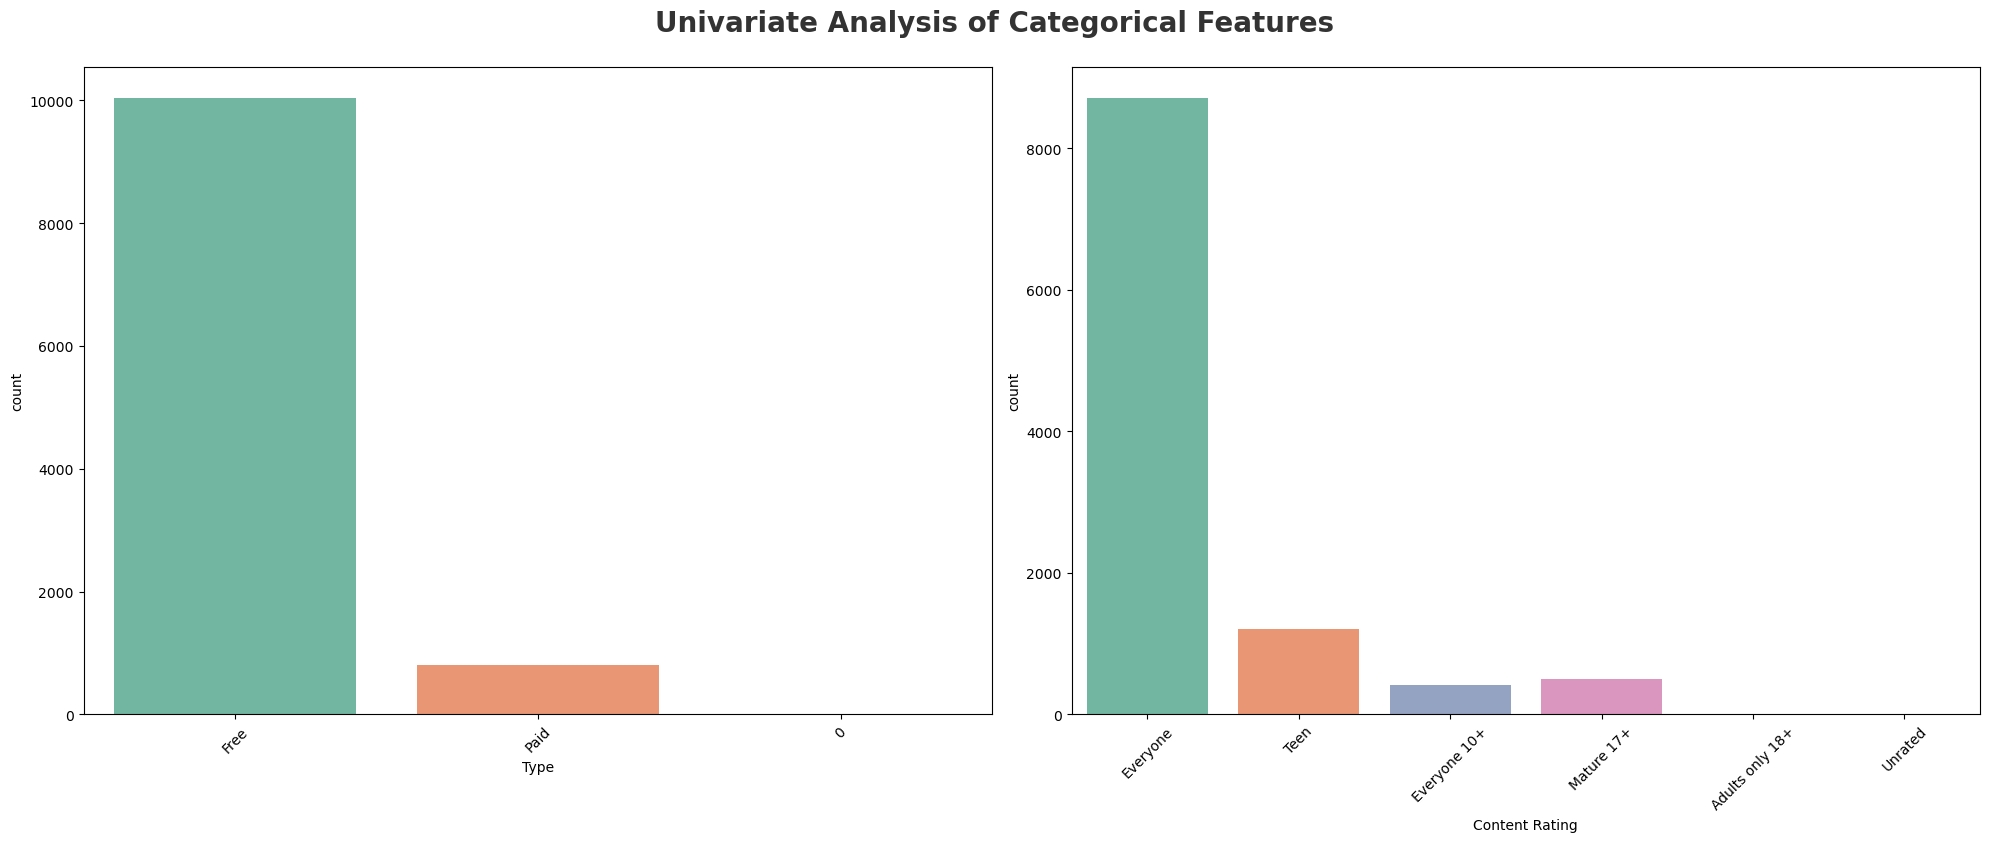

In [40]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features',
             fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


#### Which is the most popular app category?


In [41]:
df_copy.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


<Axes: ylabel='Category'>

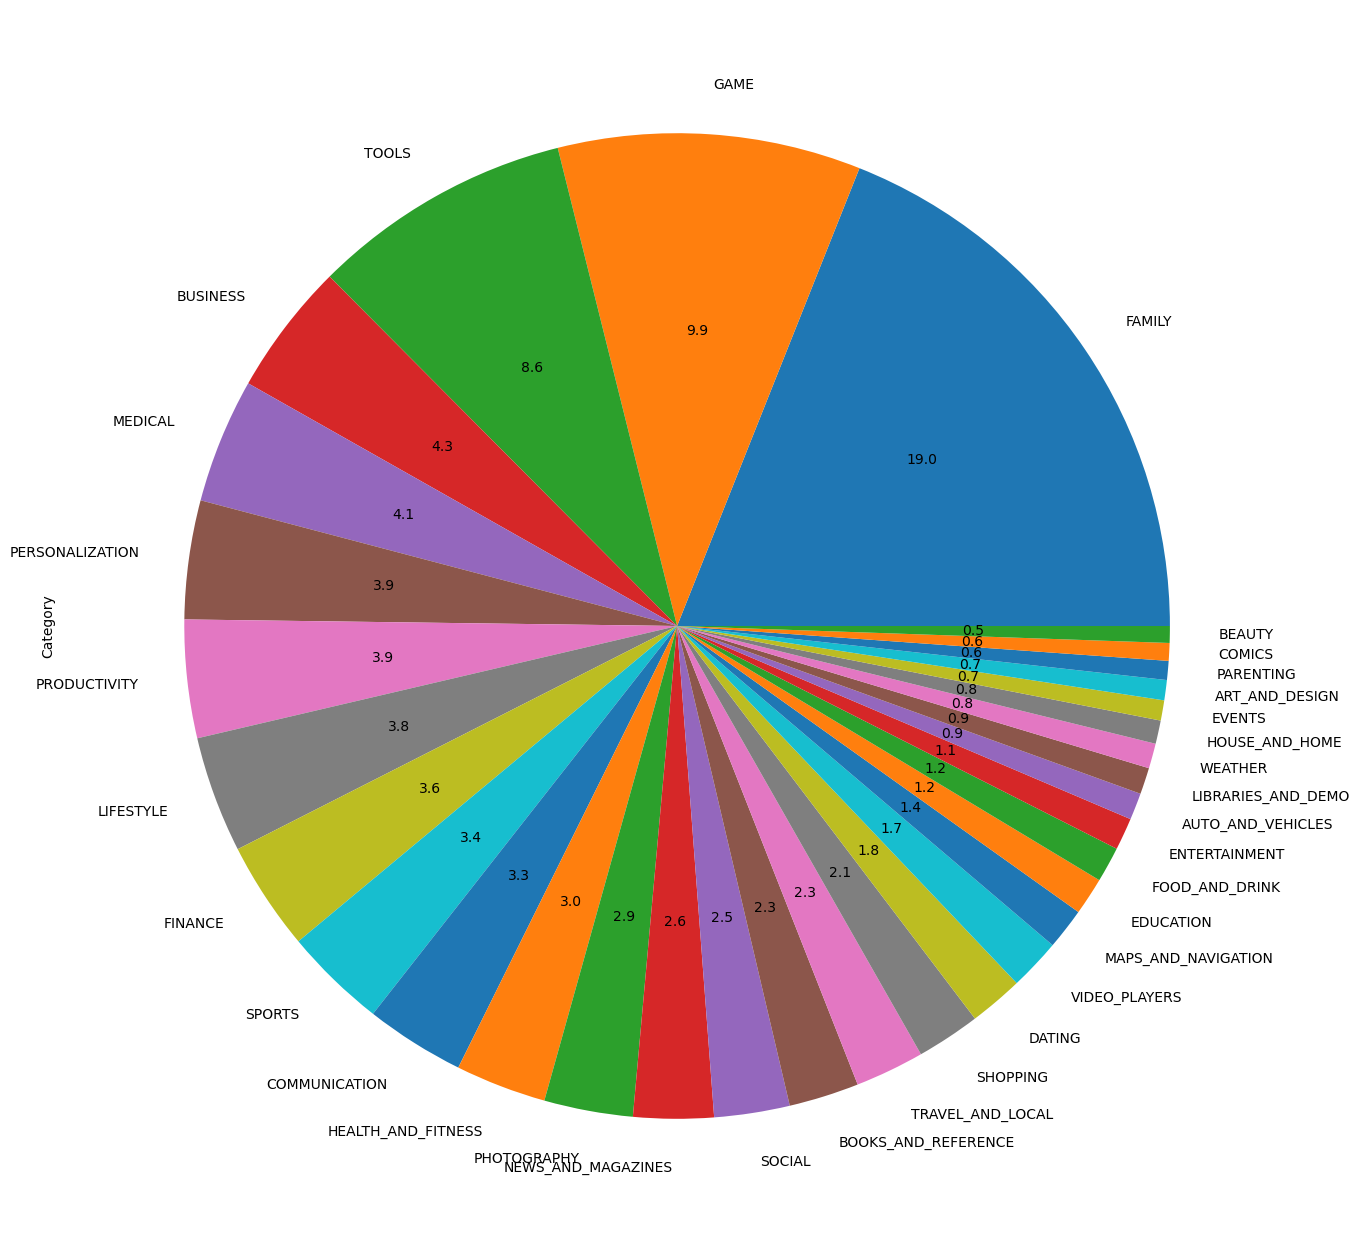

In [42]:
df_copy['Category'].value_counts().plot.pie(
    y=df_copy['Category'], figsize=(16, 16), autopct='%1.1f')


## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore


##### Top 10 App Categories


##### Dataframe of apps on the basis of category


In [43]:
# category = pd.DataFrame(df_copy['Category'].value_counts())
# category.rename(columns={'Category': 'Count'}, inplace=True)
# category.head(10)
df_copy['Category'].value_counts().sort_values(ascending=False).head(10)


FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Category, dtype: int64

##### Top 10 app


In [58]:
plt.figure(figsize=(15, 6))
sns.barplot(x=category.index[:10], y='Count',
            data=category[:10], palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()


TypeError: 'builtin_function_or_method' object is not subscriptable

<Figure size 1500x600 with 0 Axes>

## Insights

1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.


## Internal Assignments

1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??


#### Which Category has largest number of installations??


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

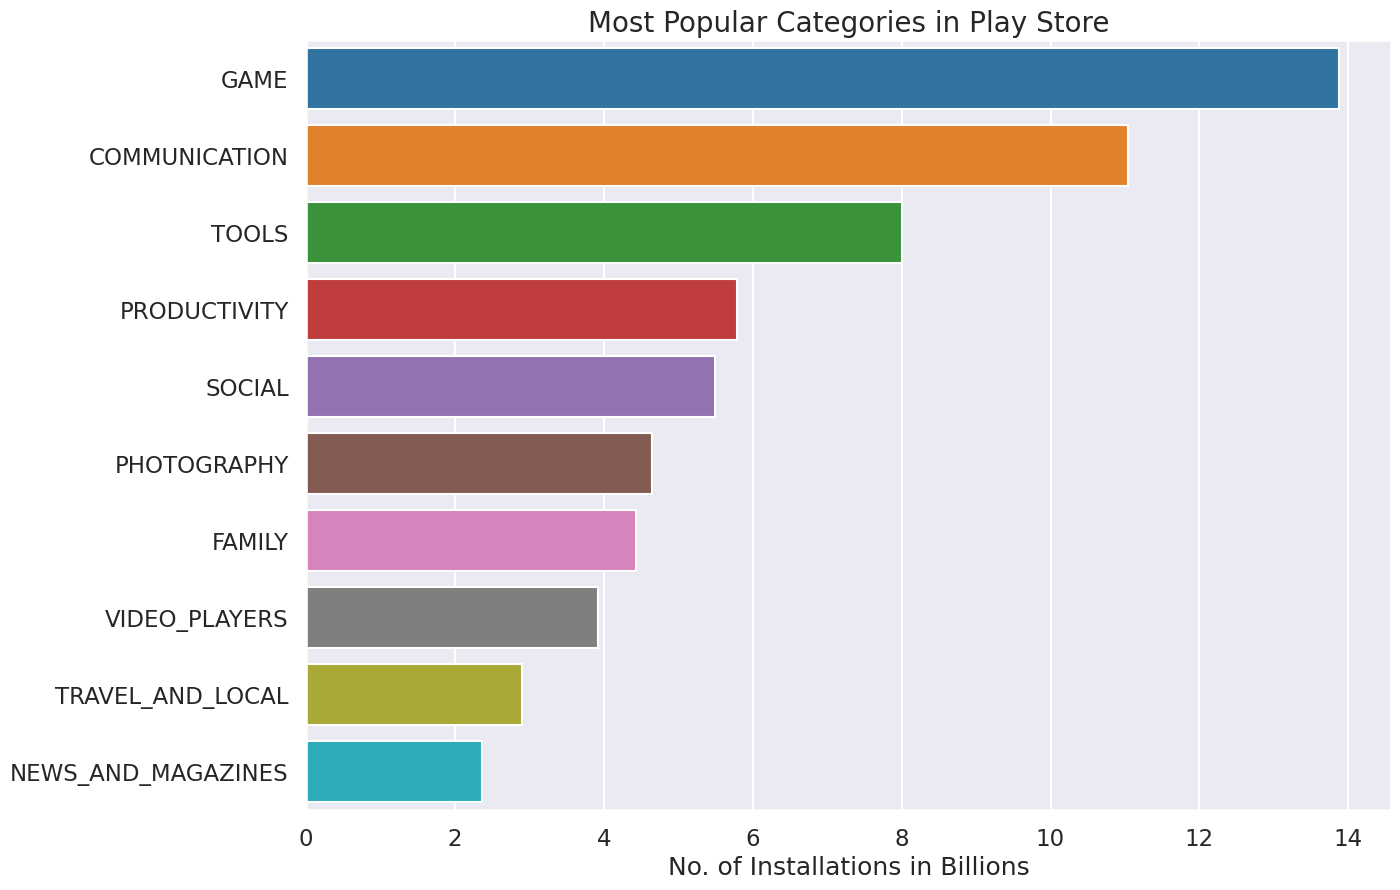

In [45]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum(
).sort_values(ascending=False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs / \
    1000000000  # converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize=(14, 10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x='Installs', y='Category', data=df2)
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size=20)


# Incomplete

#### 2. What are the Top 5 most installed Apps in Each popular Categories ??


In [46]:
df_cat_installs = df_copy.groupby(
    ['Category', 'Installs'])[['App']].sum().sort_values(by=['Category', 'Installs'], ascending=False).reset_index()
# df_cat_installs.drop_duplicates('Category', inplace=True)
# count = 0
# for i in df_cat_installs['App']:
#     print(i, "\n")
#     count += 1
#     if (count == 5):
#         count = 0
#         break
df_cat_installs['Category']

# df_cat_installs['Category'][:5]
# df_cat_installs.reset_index(drop=True, inplace=True)
# df_cat_installs.groupby(['Category']).head()


0             WEATHER
1             WEATHER
2             WEATHER
3             WEATHER
4             WEATHER
            ...      
507    ART_AND_DESIGN
508    ART_AND_DESIGN
509    ART_AND_DESIGN
510    ART_AND_DESIGN
511    ART_AND_DESIGN
Name: Category, Length: 512, dtype: object

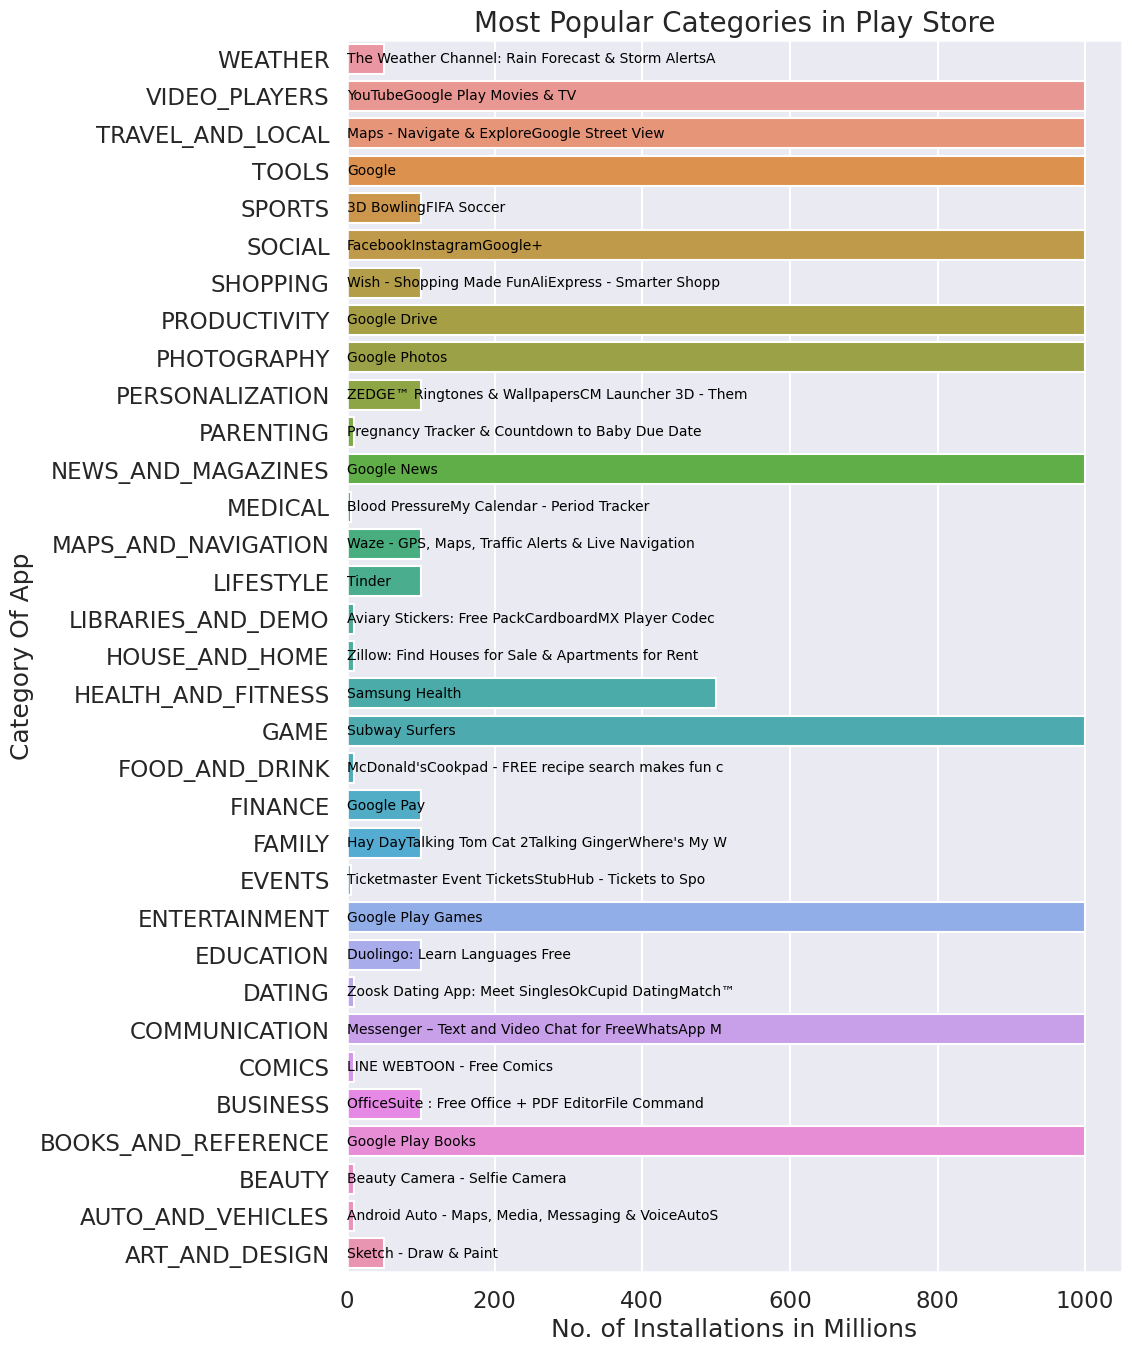

In [47]:
df_cat_installs = df_copy.groupby(
    ['Category', 'Installs'])[['App']].sum().sort_values(by=['Category', 'Installs'], ascending=False).reset_index()
df_cat_installs.drop_duplicates('Category', inplace=True)
df_cat_installs.reset_index(drop=True, inplace=True)
df_cat_installs

df_cat_installs.Installs = df_cat_installs.Installs / \
    1000000  # converting into millions

plt.figure(figsize=(10, 16))
sns.set_context("talk")
sns.set_style("darkgrid")
ls = list(df_cat_installs['App'].str[:50])
ax = sns.barplot(x='Installs', y='Category', data=df_cat_installs)

ax.set_xlabel('No. of Installations in Millions')
ax.set_ylabel('Category Of App')

ax.set_title("Most Popular Categories in Play Store", size=20)
for bar, ls in zip(ax.patches, ls[:]):
    ax.text(0.1, bar.get_y()+bar.get_height()/2,
            ls, color='black', ha='left', va='center', size=10)


#### 3. How many apps are there on Google Play Store which get 5 ratings??


In [48]:
print('Apps with 5 rating on play store are : ', (df['Rating'] == 5.0).sum())

Apps with 5 rating on play store are :  274


#### Apps with 5 rating on play store are : 274
